<a href="https://colab.research.google.com/github/Dormundo/Teste-Data-ICMC/blob/master/modelo_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

class Modelo:
    def __init__(self):
        self.df = None
        self.model = None
        self.X_test = None
        self.y_test = None

    def CarregarDataset(self, path):
        """
        Carrega o conjunto de dados Iris a partir de um arquivo CSV.
        """
        colunas = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
        self.df = pd.read_csv(path, names=colunas)
        print("Dataset carregado com sucesso!")
        print(self.df.head())

    def TratamentoDeDados(self):
        """
        Realiza o pré-processamento dos dados carregados.
        """
        if self.df.isnull().values.any():
            self.df.fillna(self.df.mean(numeric_only=True), inplace=True)

        label_encoder = LabelEncoder()
        self.df['Species'] = label_encoder.fit_transform(self.df['Species'])
        self.X = self.df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
        self.y = self.df['Species']
        self.label_encoder = label_encoder

    def Treinamento(self, modelo_escolhido="SVC"):
        """
        Treina o modelo de machine learning.
        """
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        if modelo_escolhido == "SVC":
            self.model = SVC(kernel='linear')
        elif modelo_escolhido == "LinearRegression":
            self.model = LinearRegression()
        else:
            raise ValueError("Modelo não suportado. Escolha 'SVC' ou 'LinearRegression'.")

        self.model.fit(X_train, y_train)
        print(f"Modelo {modelo_escolhido} treinado com sucesso.")

        if modelo_escolhido == "SVC":
            scores = cross_val_score(self.model, X_train, y_train, cv=5)
            print(f"Acurácia média na validação cruzada ({modelo_escolhido}): {scores.mean():.2f}")

        self.X_test, self.y_test = X_test, y_test

    def Teste(self):
        """
        Avalia o desempenho do modelo treinado nos dados de teste.
        """
        y_pred = self.model.predict(self.X_test)

        if isinstance(self.model, SVC):
            accuracy = accuracy_score(self.y_test, y_pred)
            print(f"Acurácia do modelo SVC: {accuracy:.2f}")
            print("\nRelatório de Classificação:\n", classification_report(self.y_test, y_pred, target_names=self.label_encoder.classes_))
            print("Matriz de Confusão:\n", confusion_matrix(self.y_test, y_pred))

        elif isinstance(self.model, LinearRegression):
            mse = mean_squared_error(self.y_test, y_pred)
            print(f"Erro Médio Quadrático (MSE) da Regressão Linear: {mse:.2f}")

    def PlotarFronteiraDeDecisao(self, kernel_type='linear'):
        """
        Plota a fronteira de decisão para o modelo SVM usando o kernel especificado.
        """
        # Carregar apenas as duas primeiras características do dataset para facilitar a visualização
        iris = datasets.load_iris()
        X = iris.data[:, :2]  # Usa somente SepalLength e SepalWidth
        y = iris.target

        # Criar uma instância do SVM com o kernel especificado
        svc = svm.SVC(kernel=kernel_type, C=1, gamma=0.1).fit(X, y)

        # Definir a grade para o gráfico
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

        # Prever valores e definir o contorno
        Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plotar a fronteira de decisão
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')
        plt.xlabel('Sepal Length')
        plt.ylabel('Sepal Width')
        plt.title(f'SVC com kernel {kernel_type}')
        plt.show()

    def Train(self, path="iris.data", modelo_escolhido="SVC"):
        """
        Função principal para o fluxo de treinamento e avaliação do modelo.
        """
        print(f"\nTreinando o modelo {modelo_escolhido}...")
        self.CarregarDataset(path)
        self.TratamentoDeDados()
        self.Treinamento(modelo_escolhido)
        self.Teste()





Treinando o modelo SVC...
Dataset carregado com sucesso!
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
Modelo SVC treinado com sucesso.
Acurácia média na validação cruzada (SVC): 0.96
Acurácia do modelo SVC: 1.00

Relatório de Classificação:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg     

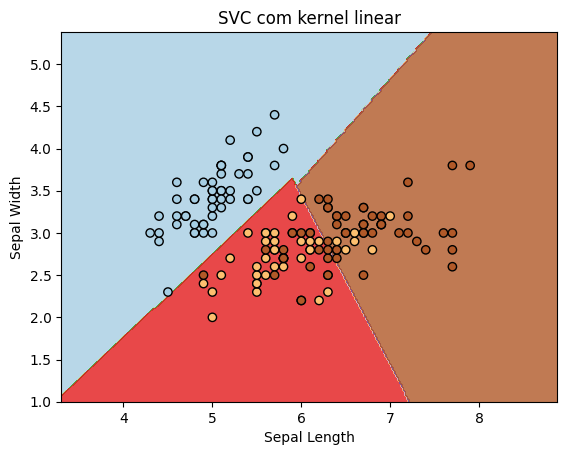

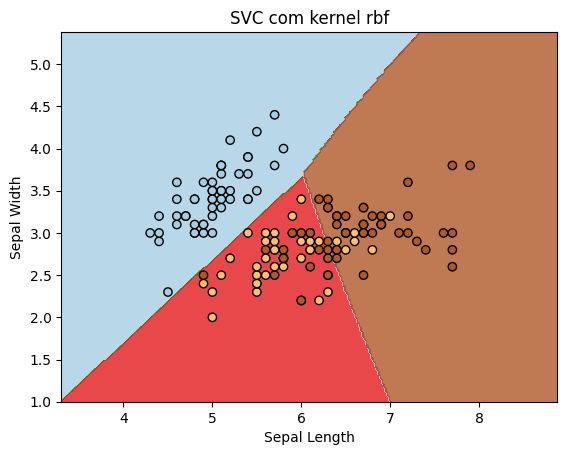

In [3]:
# Exemplo de uso:
# Defina o caminho para o dataset Iris
caminho_dataset = "/content/drive/MyDrive/python usp/iris.data"

# Instancie e treine o modelo SVC
modelo = Modelo()
modelo.Train(path=caminho_dataset, modelo_escolhido="SVC")

# Plotar fronteira de decisão com kernel linear
modelo.PlotarFronteiraDeDecisao(kernel_type='linear')

# Plotar fronteira de decisão com kernel rbf
modelo.PlotarFronteiraDeDecisao(kernel_type='rbf')